In [1]:
import h5py
import numpy as np
import glob
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

/cluster/work/bewi/members/tuncel/anaconda3/envs/r-3.4.1-env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
loc_values = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 2, 2.5, 3]

In [3]:
loc_values

[0.25, 0.5, 0.75, 1, 1.25, 1.5, 2, 2.5, 3]

In [4]:
! ls ../simulated/23-02-2018/analysis/*/clusters/

../simulated/23-02-2018/analysis/block_zifa/clusters/:
hierarchical_melanomaS2_sim_loc0.25.csv  kmeans_melanomaS2_sim_loc0.25.csv
hierarchical_melanomaS2_sim_loc0.5.csv	 kmeans_melanomaS2_sim_loc0.5.csv
hierarchical_melanomaS2_sim_loc0.75.csv  kmeans_melanomaS2_sim_loc0.75.csv
hierarchical_melanomaS2_sim_loc1.25.csv  kmeans_melanomaS2_sim_loc1.25.csv
hierarchical_melanomaS2_sim_loc1.5.csv	 kmeans_melanomaS2_sim_loc1.5.csv
hierarchical_melanomaS2_sim_loc1.csv	 kmeans_melanomaS2_sim_loc1.csv
hierarchical_melanomaS2_sim_loc2.5.csv	 kmeans_melanomaS2_sim_loc2.5.csv
hierarchical_melanomaS2_sim_loc2.csv	 kmeans_melanomaS2_sim_loc2.csv
hierarchical_melanomaS2_sim_loc3.csv	 kmeans_melanomaS2_sim_loc3.csv

../simulated/23-02-2018/analysis/factor_analysis/clusters/:
hierarchical_melanomaS2_sim_loc0.25.csv  kmeans_melanomaS2_sim_loc0.25.csv
hierarchical_melanomaS2_sim_loc0.5.csv	 kmeans_melanomaS2_sim_loc0.5.csv
hierarchical_melanomaS2_sim_loc0.75.csv  kmeans_melanomaS2_sim_loc0.75.csv
hierarchic

In [5]:
! ls /cluster/work/bewi/members/tuncel/data/fastqs/melanomaS2_fastqs/

ls: cannot access '/cluster/work/bewi/members/tuncel/data/fastqs/melanomaS2_fastqs/': No such file or directory


In [6]:
glob.glob('/cluster/work/bewi/members/tuncel/data/fastqs/melanomaS2_fastqs/*.fastq.gz')

[]

In [7]:
df1 = pd.read_csv('../simulated/23-02-2018/analysis/griph/clusters/melanomaS2_sim_loc1.csv',header=None)
df1[df1.columns[-1]]

0       4
1       4
2       6
3       2
4       5
5       7
6       3
7       1
8       4
9       5
10      3
11      6
12      3
13      5
14      4
15      5
16      5
17      2
18      5
19      4
20      4
21      3
22      4
23      5
24      5
25      5
26      7
27      7
28      5
29      5
       ..
2465    4
2466    5
2467    4
2468    2
2469    4
2470    1
2471    5
2472    5
2473    5
2474    3
2475    4
2476    4
2477    5
2478    2
2479    1
2480    5
2481    7
2482    3
2483    3
2484    5
2485    1
2486    3
2487    4
2488    6
2489    1
2490    4
2491    7
2492    5
2493    1
2494    4
Name: 0, Length: 2495, dtype: int64

In [8]:
def evaluate_once(loc_value):
    loom_file_path =  '../simulated/23-02-2018/melanomaS2_sim_loc'+str(loc_value)+'.h5'
    hier_dim_red_results_path = sorted(glob.glob('../simulated/23-02-2018/analysis/*/clusters/hierarchical_melanomaS2_sim_loc'+str(loc_value)+'.csv'))
    kmeans_dim_red_results_path = sorted(glob.glob('../simulated/23-02-2018/analysis/*/clusters/kmeans_melanomaS2_sim_loc'+str(loc_value)+'.csv'))
    cluster_results_path = sorted(glob.glob('../simulated/23-02-2018/analysis/*/clusters/melanomaS2_sim_loc'+str(loc_value)+'.csv'))
    h5f = h5py.File(loom_file_path, 'r')
    cell_groups = h5f['cell_attrs']['cell_groups'].value
    h5f.close()
    vfunc1 = np.vectorize(lambda t: t.decode('UTF-8'))
    cell_groups = vfunc1(cell_groups)
    vfunc2 = np.vectorize(lambda t: int(t[-1:]))
    cell_groups = vfunc2(cell_groups)
    results_path = hier_dim_red_results_path + kmeans_dim_red_results_path + cluster_results_path
    # cluster results
    cluster_results = []
    for c in results_path:
        c_res = pd.read_csv(c, header=None)
        cluster_results.append(c_res[c_res.columns[-1]].values)   
    results = []
    i = 0
    for cr in cluster_results:
        print (results_path[i])
        print ('nmi')
        i = i + 1
        print(normalized_mutual_info_score(cell_groups, cr))
        results.append(normalized_mutual_info_score(cell_groups, cr))
    vfunc2 = np.vectorize(lambda t: t.split('/')[4]+ '+' + t.split('/')[6].split('_')[0])
    index_list = vfunc2(results_path)
    print(index_list)
    return pd.Series(results, index=index_list)

### Testing of local csvs

In [9]:
index = evaluate_once(2).T.index.values

../simulated/23-02-2018/analysis/block_zifa/clusters/hierarchical_melanomaS2_sim_loc2.csv
nmi
0.6716915511666606
../simulated/23-02-2018/analysis/factor_analysis/clusters/hierarchical_melanomaS2_sim_loc2.csv
nmi
0.9448812586295288
../simulated/23-02-2018/analysis/pca/clusters/hierarchical_melanomaS2_sim_loc2.csv
nmi
0.9795508296978167
../simulated/23-02-2018/analysis/tsne/clusters/hierarchical_melanomaS2_sim_loc2.csv
nmi
0.9716105210702602
../simulated/23-02-2018/analysis/block_zifa/clusters/kmeans_melanomaS2_sim_loc2.csv
nmi
0.6625852024808379
../simulated/23-02-2018/analysis/factor_analysis/clusters/kmeans_melanomaS2_sim_loc2.csv
nmi
0.9378884557333141
../simulated/23-02-2018/analysis/pca/clusters/kmeans_melanomaS2_sim_loc2.csv
nmi
0.9675866755370433
../simulated/23-02-2018/analysis/tsne/clusters/kmeans_melanomaS2_sim_loc2.csv
nmi
0.9716105210702604
../simulated/23-02-2018/analysis/griph/clusters/melanomaS2_sim_loc2.csv
nmi
0.8037300678927077
../simulated/23-02-2018/analysis/phenogra

In [10]:
index

array(['block_zifa+hierarchical', 'factor_analysis+hierarchical',
       'pca+hierarchical', 'tsne+hierarchical', 'block_zifa+kmeans',
       'factor_analysis+kmeans', 'pca+kmeans', 'tsne+kmeans',
       'griph+melanomaS2', 'phenograph+melanomaS2', 'simlr+melanomaS2'],
      dtype=object)

In [11]:
df = pd.DataFrame(columns=index)
for loc in loc_values:
    df.loc[loc] = evaluate_once(loc)
    #df.append(evaluate_once(loc),ignore_index=True)

../simulated/23-02-2018/analysis/block_zifa/clusters/hierarchical_melanomaS2_sim_loc0.25.csv
nmi
0.009681116846619526
../simulated/23-02-2018/analysis/factor_analysis/clusters/hierarchical_melanomaS2_sim_loc0.25.csv
nmi
0.018536237534779166
../simulated/23-02-2018/analysis/pca/clusters/hierarchical_melanomaS2_sim_loc0.25.csv
nmi
0.016187930219829547
../simulated/23-02-2018/analysis/tsne/clusters/hierarchical_melanomaS2_sim_loc0.25.csv
nmi
0.006022188626749294
../simulated/23-02-2018/analysis/block_zifa/clusters/kmeans_melanomaS2_sim_loc0.25.csv
nmi
0.002594692561716063
../simulated/23-02-2018/analysis/factor_analysis/clusters/kmeans_melanomaS2_sim_loc0.25.csv
nmi
0.018536237534779166
../simulated/23-02-2018/analysis/pca/clusters/kmeans_melanomaS2_sim_loc0.25.csv
nmi
0.018946002083650985
../simulated/23-02-2018/analysis/tsne/clusters/kmeans_melanomaS2_sim_loc0.25.csv
nmi
0.007394825789126685
../simulated/23-02-2018/analysis/griph/clusters/melanomaS2_sim_loc0.25.csv
nmi
0.005034693092549

../simulated/23-02-2018/analysis/pca/clusters/hierarchical_melanomaS2_sim_loc2.csv
nmi
0.9795508296978167
../simulated/23-02-2018/analysis/tsne/clusters/hierarchical_melanomaS2_sim_loc2.csv
nmi
0.9716105210702602
../simulated/23-02-2018/analysis/block_zifa/clusters/kmeans_melanomaS2_sim_loc2.csv
nmi
0.6625852024808379
../simulated/23-02-2018/analysis/factor_analysis/clusters/kmeans_melanomaS2_sim_loc2.csv
nmi
0.9378884557333141
../simulated/23-02-2018/analysis/pca/clusters/kmeans_melanomaS2_sim_loc2.csv
nmi
0.9675866755370433
../simulated/23-02-2018/analysis/tsne/clusters/kmeans_melanomaS2_sim_loc2.csv
nmi
0.9716105210702604
../simulated/23-02-2018/analysis/griph/clusters/melanomaS2_sim_loc2.csv
nmi
0.8037300678927077
../simulated/23-02-2018/analysis/phenograph/clusters/melanomaS2_sim_loc2.csv
nmi
0.9980244907499315
../simulated/23-02-2018/analysis/simlr/clusters/melanomaS2_sim_loc2.csv
nmi
0.9481911658629808
['block_zifa+hierarchical' 'factor_analysis+hierarchical'
 'pca+hierarchical'

In [12]:
df

,block_zifa+hierarchical,factor_analysis+hierarchical,pca+hierarchical,tsne+hierarchical,block_zifa+kmeans,factor_analysis+kmeans,pca+kmeans,tsne+kmeans,griph+melanomaS2,phenograph+melanomaS2,simlr+melanomaS2
0.25,0.009681,0.018536,0.016188,0.006022,0.002595,0.018536,0.018946,0.007395,0.005035,0.007589,0.008950
0.50,0.005969,0.021264,0.044821,0.090100,0.005316,0.021264,0.172010,0.088040,0.007523,0.172785,0.040581
0.75,0.019625,0.023989,0.270158,0.249292,0.015791,0.024183,0.567300,0.289603,0.029968,0.472837,0.232119
1.00,0.396166,0.017421,0.805297,0.607264,0.412914,0.017421,0.864355,0.673011,0.209083,0.817293,0.557814
1.25,0.446348,0.021161,0.872163,0.891840,0.447119,0.898655,0.941514,0.890304,0.544894,0.915880,0.911928
1.50,0.445544,0.018971,0.956711,0.945829,0.456871,0.940678,0.950425,0.941745,0.831501,0.951287,0.977201
2.00,0.671692,0.944881,0.979551,0.971611,0.662585,0.937888,0.967587,0.971611,0.803730,0.998024,0.948191
2.50,0.976421,0.956860,1.000000,1.000000,0.967295,0.980685,1.000000,1.000000,0.765659,1.000000,0.985111
3.00,0.976421,0.967560,1.000000,0.997050,0.975207,0.982703,1.000000,0.997050,0.931056,1.000000,0.981813


This simulation assumes uniform variance among all of the simulated groups.


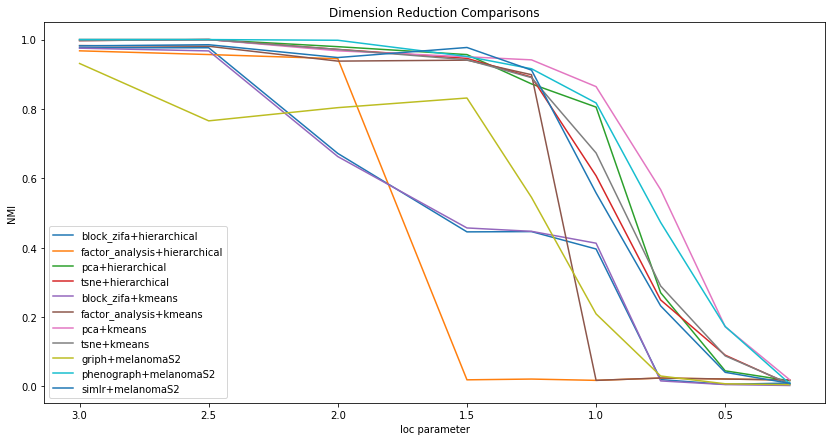

In [13]:
ax = df.plot(title='Dimension Reduction Comparisons',figsize=(14,7))
ax.set_xlabel('loc parameter')
ax.set_ylabel('NMI')
ax.invert_xaxis()

## Performance Comparison
Parses the statistics json file

In [80]:
import json
stats = None
with open('../simulated/23-02-2018/stats.json') as json_data:
    stats = json.load(json_data)
rules_runtime = stats['rules']
df_dict = pd.DataFrame(rules_runtime)
df_dict = df_dict.drop(columns=['all'], axis=1)

In [81]:
df_dict

,factor_analysis,griph,pca,phenograph,silhouette_hierarchical,silhouette_kmeans,simlr,tsne,zifa
max-runtime,4.754215,39.071136,7.221478,6.229139,13.460599,16.748804,66.865615,155.131993,1006.930979
mean-runtime,4.286418,34.972114,4.828604,4.141275,9.676970,10.555967,59.235242,112.076184,895.520182
min-runtime,3.887013,30.566954,3.395144,3.354956,6.263963,6.655851,50.874035,75.254758,682.796982


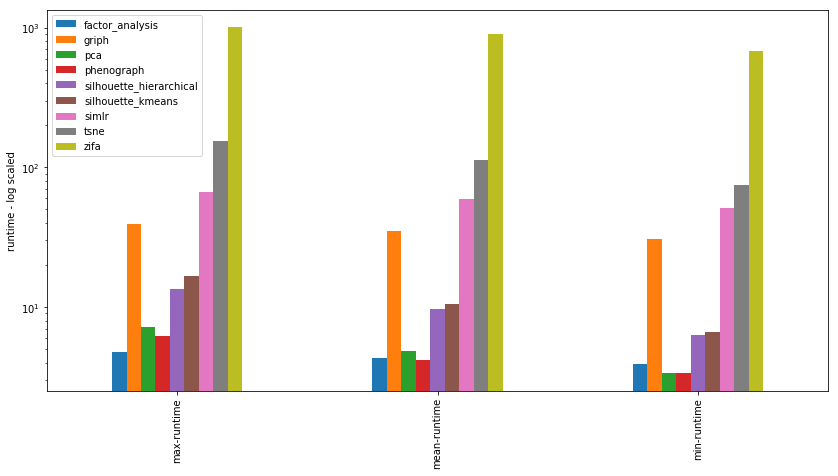

In [82]:
ax = df_dict.plot(kind='bar',figsize=(14,7), logy=True)
ax.set_ylabel('runtime - log scaled')